In [1]:
import logging
import os
import gc
import time
from datetime import datetime as dt

import numpy as np
import pandas as pd
from pandas.core.common import SettingWithCopyWarning

import warnings
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold

import lightgbm as lgb
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

from contextlib import contextmanager

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
def model_train_easy(train_df, target, test_df):
    model = lgb.LGBMRegressor(**params)
    model.fit(
        train_df, target,
        eval_set=[(train_df, target)],
        verbose=100, eval_metric='rmse',
        early_stopping_rounds=500)
    pred = model.predict(test_df)
    card_id = card_id_test
    subm = pd.DataFrame({'card_id': card_id, 'target': pred})
    subm.to_csv('lolecs_my_func_full.csv', index=False)
    
    feature_importance = pd.DataFrame()
    feature_importance['feature'] = train_df.columns
    feature_importance['importance'] = model.feature_importances_
    
    cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

    best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

    plt.figure(figsize=(16, 12));
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",
                                                                            ascending=False))
    plt.title('LGB Features (avg over folds)')
    
    return model, pred

def add_card_id():
    
    card_id_train = pd.read_csv('data/train.csv')['card_id']
    card_id_test = pd.read_csv('data/test.csv')['card_id']

    train_df['card_id'] = card_id_train
    test_df['card_id'] = card_id_test
    
    return train_df, test_df

def drop_card_id():
    train_df.drop(columns=['card_id'], inplace=True)
    test_df.drop(columns=['card_id'], inplace=True)
    
    return train_df, test_df





In [9]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 3000, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


In [8]:
target = pd.read_csv('data/train.csv')['target']
card_id_test = pd.read_csv('data/test.csv')['card_id']

In [5]:
train_df = pd.read_csv('train_df_up2.csv')
test_df = pd.read_csv('test_df.csv')

Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

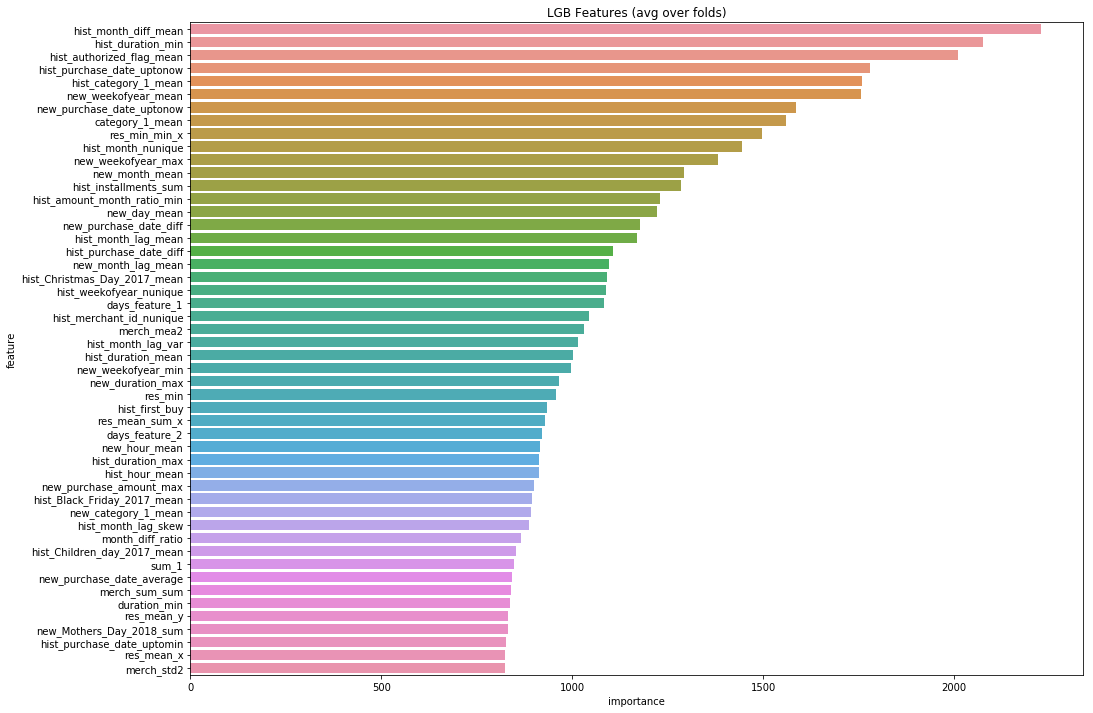

In [10]:
model, pred = model_train_easy(train_df, target, test_df)

In [11]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 3500, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

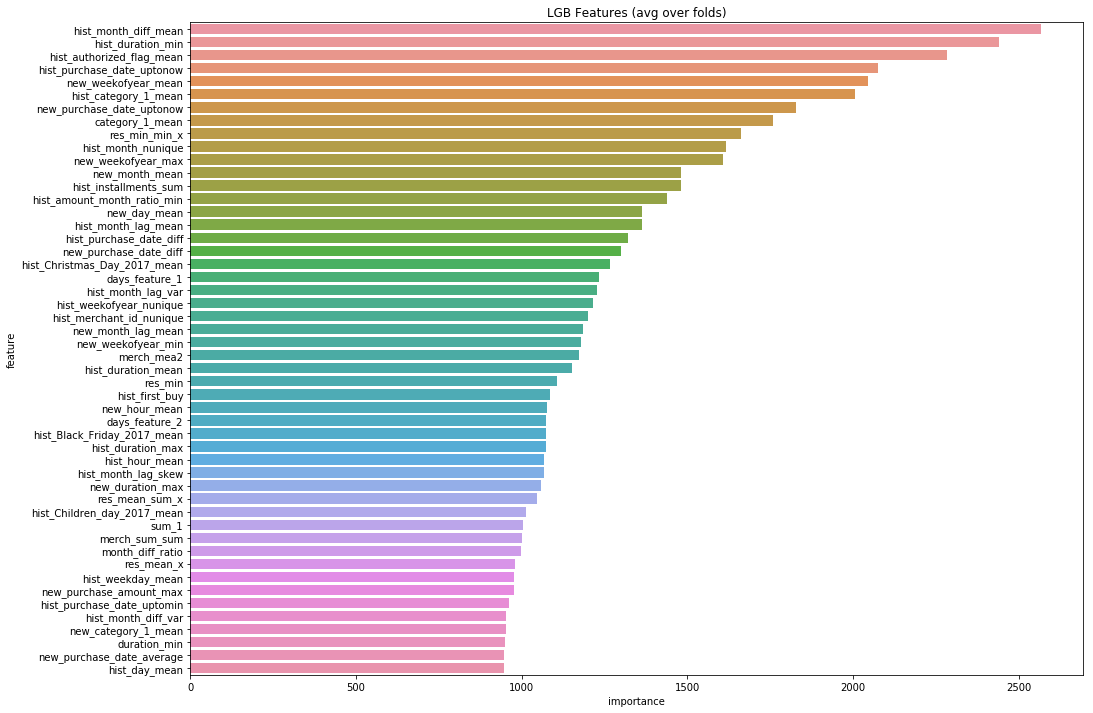

In [12]:
model, pred = model_train_easy(train_df, target, test_df)

In [13]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 4000, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

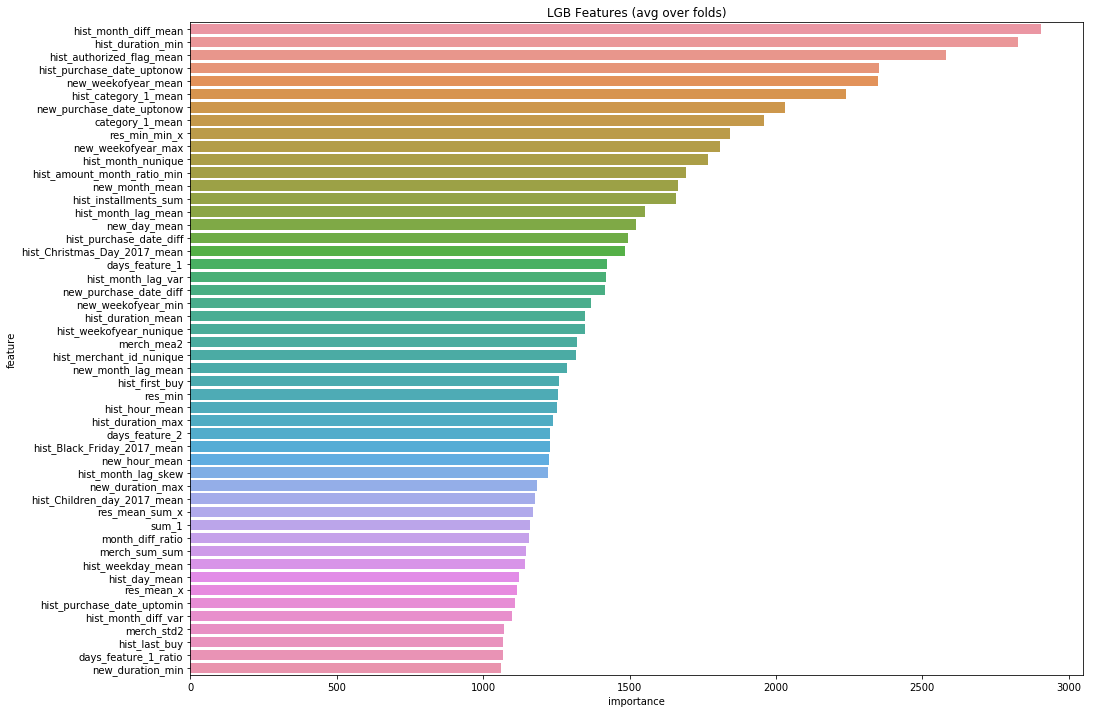

In [14]:
model, pred = model_train_easy(train_df, target, test_df)

In [16]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 4500, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

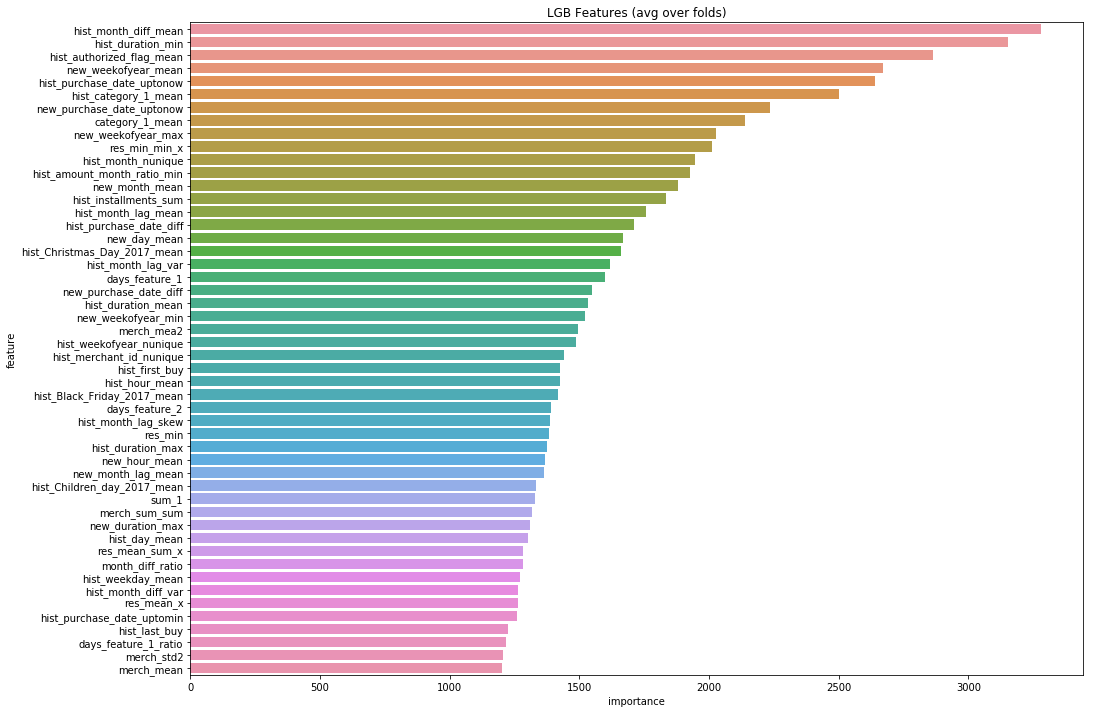

In [17]:
model, pred = model_train_easy(train_df, target, test_df)

In [19]:
display(train_df.head(5))
print(test_df.shape)

,feature_1,feature_2,feature_3,quarter,elapsed_time,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,...,std_1,merch_mea2,merch_sum2,merch_std2,merch_mean3,merch_sum3,merch_std3,merch_mean4,merch_sum4,merch_std4
0,0.013145,0.00875,0.011430,2,604,3020,0.008280,1208,0.003311,604,...,2.467874e+07,4.048154,1052.52,8.322065,7.156572e+06,1.860709e+09,1.850213e+07,41892.183064,1.089197e+07,132690.750438
1,0.010710,0.01138,0.010284,1,755,3020,0.005300,755,0.001325,0,...,2.154601e+07,4.744429,1660.55,15.208781,3.660194e+06,1.281068e+09,9.617920e+06,16448.748427,5.757062e+06,64279.835391
2,0.010610,0.00875,0.010284,3,908,1816,0.002203,1816,0.002203,0,...,1.689952e+07,0.559302,24.05,1.930055,8.998578e+05,3.869388e+07,5.208762e+06,6365.739513,2.737268e+05,36752.974164
3,0.010710,0.01417,0.010284,3,512,2048,0.007812,1536,0.005860,0,...,3.479156e+07,4.507403,347.07,10.542779,4.404272e+05,3.391290e+07,1.460069e+06,3654.164538,2.813707e+05,12785.198894
4,0.008060,0.01417,0.010284,4,451,451,0.002218,1353,0.006653,0,...,2.619013e+07,5.030000,668.99,8.528768,2.227379e+05,2.962414e+07,1.596177e+06,1123.783334,1.494632e+05,6100.573743


(123623, 250)


In [ ]:
##############################################################################################################################


In [21]:
train_df_algoparams = train_df
test_df_algoparams = test_df

In [20]:
hist = pd.read_csv('historical_transactions_up.csv')
new = pd.read_csv('data/new_merchant_transactions.csv')

new['purchase_amount'] = np.round(new['purchase_amount'] / 0.00150265118 + 497.06,2)

display(hist.head(5))
display(new.head(5))

print(new['purchase_amount'][:5])

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,imputed_merchant_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,29.00,2017-06-25 15:33:07,1.0,16,37,NaN
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,9.17,2017-07-15 12:10:45,1.0,16,16,NaN
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,17.65,2017-08-09 22:04:29,1.0,16,37,NaN
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,7.69,2017-09-02 10:06:26,1.0,16,34,NaN
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,16.00,2017-03-10 01:14:19,1.0,16,37,NaN


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,126.00,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,118.01,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,130.35,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,49.90,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,57.90,2018-03-22 21:07:53,NaN,-1,29


0    126.00
1    118.01
2    130.35
3     49.90
4     57.90
Name: purchase_amount, dtype: float64


In [23]:
train_df, test_df = add_card_id()

In [24]:
hist_lag0 = hist[hist['month_lag'] == 0].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag0.columns = ['card_id', 'lag0_max', 'lag0_min']

hist_lag1 = hist[hist['month_lag'] == -1].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag1.columns = ['card_id','lag1_max', 'lag1_min']

hist_lag2 = hist[hist['month_lag'] == -2].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag2.columns = ['card_id','lag2_max', 'lag2_min']

hist_lag3 = hist[hist['month_lag'] == -3].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag3.columns = ['card_id','lag3_max', 'lag3_min']

hist_lag4 = hist[hist['month_lag'] == -4].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag4.columns = ['card_id','lag4_max', 'lag4_min']

hist_lag5 = hist[hist['month_lag'] == -5].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag5.columns = ['card_id','lag5_max', 'lag5_min']

hist_lag6 = hist[hist['month_lag'] == -6].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag6.columns = ['card_id','lag6_max', 'lag6_min']

hist_lag7 = hist[hist['month_lag'] == -7].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag7.columns = ['card_id','lag7_max', 'lag7_min']

hist_lag8 = hist[hist['month_lag'] == -8].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag8.columns = ['card_id','lag8_max', 'lag8_min']

hist_lag9 = hist[hist['month_lag'] == -9].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag9.columns = ['card_id','lag9_max', 'lag9_min']

hist_lag10 = hist[hist['month_lag'] == -10].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag10.columns = ['card_id','lag10_max', 'lag10_min']

hist_lag11 = hist[hist['month_lag'] == -11].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag11.columns = ['card_id','lag11_max', 'lag11_min']

hist_lag12 = hist[hist['month_lag'] == -12].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag12.columns = ['card_id','lag12_max', 'lag12_min']

hist_lag13 = hist[hist['month_lag'] == -13].groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
hist_lag13.columns = ['card_id','lag13_max', 'lag13_min']


new_purch = new.groupby('card_id')['purchase_amount'].agg(['max', 'min']).reset_index()
new_purch.columns = ['card_id', 'new_max', 'new_min']


In [25]:
new_hist_lag0 = pd.merge(new_purch, hist_lag0, on='card_id', how='left')
new_hist_lag0['res_max_0'] = new_hist_lag0['new_max'] / new_hist_lag0['lag0_max']
new_hist_lag0['res_min_0'] = new_hist_lag0['new_min'] / new_hist_lag0['lag0_min']

new_hist_lag0['res_max_min_0'] = new_hist_lag0['new_max'] / new_hist_lag0['lag0_min']

lag_0 = pd.DataFrame({'card_id': new_hist_lag0['card_id'], 
                      'res_max_0': new_hist_lag0['res_max_0'], 'res_min_0': new_hist_lag0['res_min_0'],
                    'res_max_min_0': new_hist_lag0['res_max_min_0'] })
lag_0.fillna(lag_0.iloc[:, 1:].median(), inplace=True)


In [26]:
new_hist_lag1 = pd.merge(new_purch, hist_lag1, on='card_id', how='left')
new_hist_lag1['res_max_1'] = new_hist_lag1['new_max'] / new_hist_lag1['lag1_max']
new_hist_lag1['res_min_1'] = new_hist_lag1['new_min'] / new_hist_lag1['lag1_min']

new_hist_lag1['res_max_min_1'] = new_hist_lag1['new_max'] / new_hist_lag1['lag1_min']

lag_1 = pd.DataFrame({'card_id': new_hist_lag1['card_id'], 
                      'res_max_1': new_hist_lag1['res_max_1'], 'res_min_1': new_hist_lag1['res_min_1'],
                    'res_max_min_1': new_hist_lag1['res_max_min_1'] })
lag_1.fillna(lag_1.iloc[:, 1:].median(), inplace=True)


In [27]:
new_hist_lag2 = pd.merge(new_purch, hist_lag2, on='card_id', how='left')
new_hist_lag2['res_max_2'] = new_hist_lag2['new_max'] / new_hist_lag2['lag2_max']
new_hist_lag2['res_min_2'] = new_hist_lag2['new_min'] / new_hist_lag2['lag2_min']

new_hist_lag2['res_max_min_2'] = new_hist_lag2['new_max'] / new_hist_lag2['lag2_min']

lag_2 = pd.DataFrame({'card_id': new_hist_lag2['card_id'], 
                      'res_max_2': new_hist_lag2['res_max_2'], 'res_min_2': new_hist_lag2['res_min_2'],
                    'res_max_min_2': new_hist_lag2['res_max_min_2'] })
lag_2.fillna(lag_2.iloc[:, 1:].median(), inplace=True)


In [28]:
new_hist_lag3 = pd.merge(new_purch, hist_lag3, on='card_id', how='left')
new_hist_lag3['res_max_3'] = new_hist_lag3['new_max'] / new_hist_lag3['lag3_max']
new_hist_lag3['res_min_3'] = new_hist_lag3['new_min'] / new_hist_lag3['lag3_min']

new_hist_lag3['res_max_min_3'] = new_hist_lag3['new_max'] / new_hist_lag3['lag3_min']

lag_3 = pd.DataFrame({'card_id': new_hist_lag3['card_id'], 
                      'res_max_3': new_hist_lag3['res_max_3'], 'res_min_3': new_hist_lag3['res_min_3'],
                    'res_max_min_3': new_hist_lag3['res_max_min_3'] })
lag_3.fillna(lag_3.iloc[:, 1:].median(), inplace=True)


In [29]:
new_hist_lag4 = pd.merge(new_purch, hist_lag4, on='card_id', how='left')
new_hist_lag4['res_max_4'] = new_hist_lag4['new_max'] / new_hist_lag4['lag4_max']
new_hist_lag4['res_min_4'] = new_hist_lag4['new_min'] / new_hist_lag4['lag4_min']

new_hist_lag4['res_max_min_4'] = new_hist_lag4['new_max'] / new_hist_lag4['lag4_min']

lag_4 = pd.DataFrame({'card_id': new_hist_lag4['card_id'], 
                      'res_max_4': new_hist_lag4['res_max_4'], 'res_min_4': new_hist_lag4['res_min_4'],
                    'res_max_min_4': new_hist_lag4['res_max_min_4'] })
lag_4.fillna(lag_4.iloc[:, 1:].median(), inplace=True)


In [30]:
new_hist_lag5 = pd.merge(new_purch, hist_lag5, on='card_id', how='left')
new_hist_lag5['res_max_5'] = new_hist_lag5['new_max'] / new_hist_lag5['lag5_max']
new_hist_lag5['res_min_5'] = new_hist_lag5['new_min'] / new_hist_lag5['lag5_min']

new_hist_lag5['res_max_min_5'] = new_hist_lag5['new_max'] / new_hist_lag5['lag5_min']

lag_5 = pd.DataFrame({'card_id': new_hist_lag5['card_id'], 
                      'res_max_5': new_hist_lag5['res_max_5'], 'res_min_5': new_hist_lag5['res_min_5'],
                    'res_max_min_5': new_hist_lag5['res_max_min_5'] })
lag_5.fillna(lag_5.iloc[:, 1:].median(), inplace=True)


In [31]:
new_hist_lag6 = pd.merge(new_purch, hist_lag6, on='card_id', how='left')
new_hist_lag6['res_max_6'] = new_hist_lag6['new_max'] / new_hist_lag6['lag6_max']
new_hist_lag6['res_min_6'] = new_hist_lag6['new_min'] / new_hist_lag6['lag6_min']

new_hist_lag6['res_max_min_6'] = new_hist_lag6['new_max'] / new_hist_lag6['lag6_min']

lag_6 = pd.DataFrame({'card_id': new_hist_lag6['card_id'], 
                      'res_max_6': new_hist_lag6['res_max_6'], 'res_min_6': new_hist_lag6['res_min_6'],
                    'res_max_min_6': new_hist_lag6['res_max_min_6'] })
lag_6.fillna(lag_6.iloc[:, 1:].median(), inplace=True)


In [32]:
new_hist_lag7 = pd.merge(new_purch, hist_lag7, on='card_id', how='left')
new_hist_lag7['res_max_7'] = new_hist_lag7['new_max'] / new_hist_lag7['lag7_max']
new_hist_lag7['res_min_7'] = new_hist_lag7['new_min'] / new_hist_lag7['lag7_min']

new_hist_lag7['res_max_min_7'] = new_hist_lag7['new_max'] / new_hist_lag7['lag7_min']

lag_7 = pd.DataFrame({'card_id': new_hist_lag7['card_id'], 
                      'res_max_7': new_hist_lag7['res_max_7'], 'res_min_7': new_hist_lag7['res_min_7'],
                    'res_max_min_7': new_hist_lag7['res_max_min_7'] })
lag_7.fillna(lag_7.iloc[:, 1:].median(), inplace=True)


In [33]:
new_hist_lag8 = pd.merge(new_purch, hist_lag8, on='card_id', how='left')
new_hist_lag8['res_max_8'] = new_hist_lag8['new_max'] / new_hist_lag8['lag8_max']
new_hist_lag8['res_min_8'] = new_hist_lag8['new_min'] / new_hist_lag8['lag8_min']

new_hist_lag8['res_max_min_8'] = new_hist_lag8['new_max'] / new_hist_lag8['lag8_min']

lag_8 = pd.DataFrame({'card_id': new_hist_lag8['card_id'], 
                      'res_max_8': new_hist_lag8['res_max_8'], 'res_min_8': new_hist_lag8['res_min_8'],
                    'res_max_min_8': new_hist_lag8['res_max_min_8'] })
lag_8.fillna(lag_8.iloc[:, 1:].median(), inplace=True)


In [34]:
new_hist_lag9 = pd.merge(new_purch, hist_lag9, on='card_id', how='left')
new_hist_lag9['res_max_9'] = new_hist_lag9['new_max'] / new_hist_lag9['lag9_max']
new_hist_lag9['res_min_9'] = new_hist_lag9['new_min'] / new_hist_lag9['lag9_min']

new_hist_lag9['res_max_min_9'] = new_hist_lag9['new_max'] / new_hist_lag9['lag9_min']

lag_9 = pd.DataFrame({'card_id': new_hist_lag9['card_id'], 
                      'res_max_9': new_hist_lag9['res_max_9'], 'res_min_9': new_hist_lag9['res_min_9'],
                    'res_max_min_9': new_hist_lag9['res_max_min_9'] })
lag_9.fillna(lag_9.iloc[:, 1:].median(), inplace=True)


In [35]:
new_hist_lag10 = pd.merge(new_purch, hist_lag10, on='card_id', how='left')
new_hist_lag10['res_max_10'] = new_hist_lag10['new_max'] / new_hist_lag10['lag10_max']
new_hist_lag10['res_min_10'] = new_hist_lag10['new_min'] / new_hist_lag10['lag10_min']

new_hist_lag10['res_max_min_10'] = new_hist_lag10['new_max'] / new_hist_lag10['lag10_min']

lag_10 = pd.DataFrame({'card_id': new_hist_lag10['card_id'], 
                      'res_max_10': new_hist_lag10['res_max_10'], 'res_min_10': new_hist_lag10['res_min_10'],
                    'res_max_min_10': new_hist_lag10['res_max_min_10'] })
lag_10.fillna(lag_10.iloc[:, 1:].median(), inplace=True)


In [36]:
new_hist_lag11 = pd.merge(new_purch, hist_lag11, on='card_id', how='left')
new_hist_lag11['res_max_11'] = new_hist_lag11['new_max'] / new_hist_lag11['lag11_max']
new_hist_lag11['res_min_11'] = new_hist_lag11['new_min'] / new_hist_lag11['lag11_min']

new_hist_lag11['res_max_min_11'] = new_hist_lag11['new_max'] / new_hist_lag11['lag11_min']

lag_11 = pd.DataFrame({'card_id': new_hist_lag11['card_id'], 
                      'res_max_11': new_hist_lag11['res_max_11'], 'res_min_11': new_hist_lag11['res_min_11'],
                    'res_max_min_11': new_hist_lag11['res_max_min_11'] })
lag_11.fillna(lag_11.iloc[:, 1:].median(), inplace=True)


In [37]:
new_hist_lag12 = pd.merge(new_purch, hist_lag12, on='card_id', how='left')
new_hist_lag12['res_max_12'] = new_hist_lag12['new_max'] / new_hist_lag12['lag12_max']
new_hist_lag12['res_min_12'] = new_hist_lag12['new_min'] / new_hist_lag12['lag12_min']

new_hist_lag12['res_max_min_12'] = new_hist_lag12['new_max'] / new_hist_lag12['lag12_min']

lag_12 = pd.DataFrame({'card_id': new_hist_lag12['card_id'], 
                      'res_max_12': new_hist_lag12['res_max_12'], 'res_min_12': new_hist_lag12['res_min_12'],
                    'res_max_min_12': new_hist_lag12['res_max_min_12'] })
lag_12.fillna(lag_12.iloc[:, 1:].median(), inplace=True)


In [38]:
new_hist_lag13 = pd.merge(new_purch, hist_lag13, on='card_id', how='left')
new_hist_lag13['res_max_13'] = new_hist_lag13['new_max'] / new_hist_lag13['lag13_max']
new_hist_lag13['res_min_13'] = new_hist_lag13['new_min'] / new_hist_lag13['lag13_min']

new_hist_lag13['res_max_min_13'] = new_hist_lag13['new_max'] / new_hist_lag13['lag13_min']

lag_13 = pd.DataFrame({'card_id': new_hist_lag13['card_id'], 
                      'res_max_13': new_hist_lag13['res_max_13'], 'res_min_13': new_hist_lag13['res_min_13'],
                    'res_max_min_13': new_hist_lag13['res_max_min_13'] })
lag_13.fillna(lag_13.iloc[:, 1:].median(), inplace=True)


In [39]:
lag_0.shape[0] + lag_1.shape[0] + lag_2.shape[0] + lag_3.shape[0] + lag_4.shape[0] + lag_5.shape[0] \
+ lag_6.shape[0] + lag_7.shape[0]+ lag_8.shape[0] + lag_9.shape[0] + lag_10.shape[0] + lag_11.shape[0] \
+ lag_12.shape[0] + lag_13.shape[0]

4060014

In [40]:
lag = pd.concat([lag_0, lag_1, lag_2, lag_3, lag_4, lag_5,
                 lag_6, lag_7, lag_8, lag_9, lag_10, lag_11, lag_12, lag_13], axis=0)




In [41]:
lag['res_max'] = 0

sc2 = lag_0.shape[0]
lag['res_max'].iloc[:sc2] = lag['res_max_0'].iloc[:sc2]

sc1 = lag_0.shape[0]
sc2 = sc1 + lag_1.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_1'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_2.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_2'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_3.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_3'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_4.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_4'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_5.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_5'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_6.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_6'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_7.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_7'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_8.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_8'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_9.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_9'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_10.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_10'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_11.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_11'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_12.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_12'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_13.shape[0]
lag['res_max'].iloc[sc1:sc2] = lag['res_max_13'].iloc[sc1:sc2]

# lag['res_max'].iloc[lag_4.shape[0]:lag_5.shape[0]] = lag['res_max_5'].iloc[lag_4.shape[0]:lag_5.shape[0]]
# lag['res_max'].iloc[lag_5.shape[0]:lag_6.shape[0]] = lag['res_max_6'].iloc[lag_5.shape[0]:lag_6.shape[0]]
# lag['res_max'].iloc[lag_6.shape[0]:lag_7.shape[0]] = lag['res_max_7'].iloc[lag_6.shape[0]:lag_7.shape[0]]
# lag['res_max'].iloc[lag_7.shape[0]:lag_8.shape[0]] = lag['res_max_8'].iloc[lag_7.shape[0]:lag_8.shape[0]]
# lag['res_max'].iloc[lag_8.shape[0]:lag_9.shape[0]] = lag['res_max_9'].iloc[lag_8.shape[0]:lag_9.shape[0]]
# lag['res_max'].iloc[lag_9.shape[0]:lag_10.shape[0]] = lag['res_max_10'].iloc[lag_9.shape[0]:lag_10.shape[0]]
# lag['res_max'].iloc[lag_10.shape[0]:lag_11.shape[0]] = lag['res_max_11'].iloc[lag_10.shape[0]:lag_11.shape[0]]
# lag['res_max'].iloc[lag_11.shape[0]:lag_12.shape[0]] = lag['res_max_12'].iloc[lag_11.shape[0]:lag_12.shape[0]]
# lag['res_max'].iloc[lag_11.shape[0]:lag_13.shape[0]] = lag['res_max_13'].iloc[lag_12.shape[0]:lag_13.shape[0]]

In [42]:
lag['res_min'] = 0

sc2 = lag_0.shape[0]
lag['res_min'].iloc[:sc2] = lag['res_min_0'].iloc[:sc2]

sc1 = lag_0.shape[0]
sc2 = sc1 + lag_1.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_1'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_2.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_2'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_3.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_3'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_4.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_4'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_5.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_5'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_6.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_6'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_7.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_7'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_8.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_8'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_9.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_9'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_10.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_10'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_11.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_11'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_12.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_12'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_13.shape[0]
lag['res_min'].iloc[sc1:sc2] = lag['res_min_13'].iloc[sc1:sc2]

In [43]:
lag['res_max_min'] = 0

sc2 = lag_0.shape[0]
lag['res_max_min'].iloc[:sc2] = lag['res_max_min_0'].iloc[:sc2]

sc1 = lag_0.shape[0]
sc2 = sc1 + lag_1.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_1'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_2.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_2'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_3.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_3'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_4.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_4'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_5.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_5'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_6.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_6'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_7.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_7'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_8.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_8'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_9.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_9'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_10.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_10'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_11.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_11'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_12.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_12'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_13.shape[0]
lag['res_max_min'].iloc[sc1:sc2] = lag['res_max_min_13'].iloc[sc1:sc2]

In [44]:
lag_f = lag.groupby('card_id')['res_max'].agg(['mean', 'sum', 'max', 'min', 'std']).reset_index()
lag_f.columns = ['card_id', 'res_mean', 'res_sum', 'res_max', 'res_min', 'res_std']

lag_f_sum = lag.groupby('card_id')['res_min'].agg(['mean', 'sum' ,'max', 'min', 'std']).reset_index()
lag_f_sum.columns = ['card_id', 'res_mean_sum', 'res_sum_sum', 'res_max_max', 'res_min_min', 'res_std_std']

lag_f_mean_sum = lag.groupby('card_id')['res_max_min'].agg(['mean', 'sum',  'max', 'min', 'std']).reset_index()
lag_f_mean_sum.columns = ['card_id', 'res_mean_sum_1', 'res_sum_sum_1', 'res_max_1', 'res_min_1', 'res_std_1']

lag_f.head(5)

,card_id,res_mean,res_sum,res_max,res_min,res_std
0,C_ID_00007093c1,0.221080,3.095122,0.799132,0.040000,0.191880
1,C_ID_0001238066,1.242536,17.395506,3.867026,0.441312,0.880388
2,C_ID_0001506ef0,0.300162,4.202272,1.285977,0.014085,0.404661
3,C_ID_0001793786,1.313266,18.385718,2.196062,0.731334,0.515538
4,C_ID_000183fdda,0.656932,9.197053,0.866700,0.182028,0.258106


In [45]:
train_df = pd.merge(train_df, lag_f, on='card_id', how='left')
test_df = pd.merge(test_df, lag_f, on='card_id', how='left')

train_df = pd.merge(train_df, lag_f_sum, on='card_id', how='left')
test_df = pd.merge(test_df, lag_f_sum, on='card_id', how='left')

train_df = pd.merge(train_df, lag_f_mean_sum, on='card_id', how='left')
test_df = pd.merge(test_df, lag_f_mean_sum, on='card_id', how='left')

In [46]:
train_df.head(5)

,feature_1,feature_2,feature_3,quarter,elapsed_time,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,...,res_mean_sum,res_sum_sum,res_max_max,res_min_min,res_std_std,res_mean_sum_1,res_sum_sum_1,res_max_1,res_min_1,res_std_1
0,0.013145,0.00875,0.011430,2,604,3020,0.008280,1208,0.003311,604,...,1.673106,23.423485,3.000000,0.619579,0.699550,28.053570,392.749978,60.000000,8.240000,19.121922
1,0.010710,0.01138,0.010284,1,755,3020,0.005300,755,0.001325,0,...,0.942100,13.189405,1.663333,0.332667,0.384746,5.761159,80.656232,9.993333,1.998667,2.402784
2,0.010610,0.00875,0.010284,3,908,1816,0.002203,1816,0.002203,0,...,1.381465,19.340515,2.777778,0.544051,0.622733,2.640194,36.962722,11.046756,0.544051,3.217967
3,0.010710,0.01417,0.010284,3,512,2048,0.007812,1536,0.005860,0,...,1.262188,17.670635,2.125000,0.425000,0.387607,13.235265,185.293713,29.975000,5.995000,7.444537
4,0.008060,0.01417,0.010284,4,451,451,0.002218,1353,0.006653,0,...,1.697362,23.763072,10.000000,0.196232,2.408675,139.666528,1955.331392,1594.240000,8.240000,420.529817


In [47]:
train_df, test_df = drop_card_id()

Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.72017
[200]	training's rmse: 3.65716
[300]	training's rmse: 3.61927
[400]	training's rmse: 3.59314
[500]	training's rmse: 3.57317
[600]	training's rmse: 3.55715
[700]	training's rmse: 3.54322
[800]	training's rmse: 3.53116
[900]	training's rmse: 3.51959
[1000]	training's rmse: 3.50891
[1100]	training's rmse: 3.49876
[1200]	training's rmse: 3.48967
[1300]	training's rmse: 3.48065
[1400]	training's rmse: 3.47203
[1500]	training's rmse: 3.46386
[1600]	training's rmse: 3.45536
[1700]	training's rmse: 3.44681
[1800]	training's rmse: 3.43859
[1900]	training's rmse: 3.43063
[2000]	training's rmse: 3.42287
[2100]	training's rmse: 3.41521
[2200]	training's rmse: 3.40741
[2300]	training's rmse: 3.40011
[2400]	training's rmse: 3.39278
[2500]	training's rmse: 3.38495
[2600]	training's rmse: 3.37737
[2700]	training's rmse: 3.36988
[2800]	training's rmse: 3.36263
[2900]	training's rmse: 3.35548
[3000]	training's 

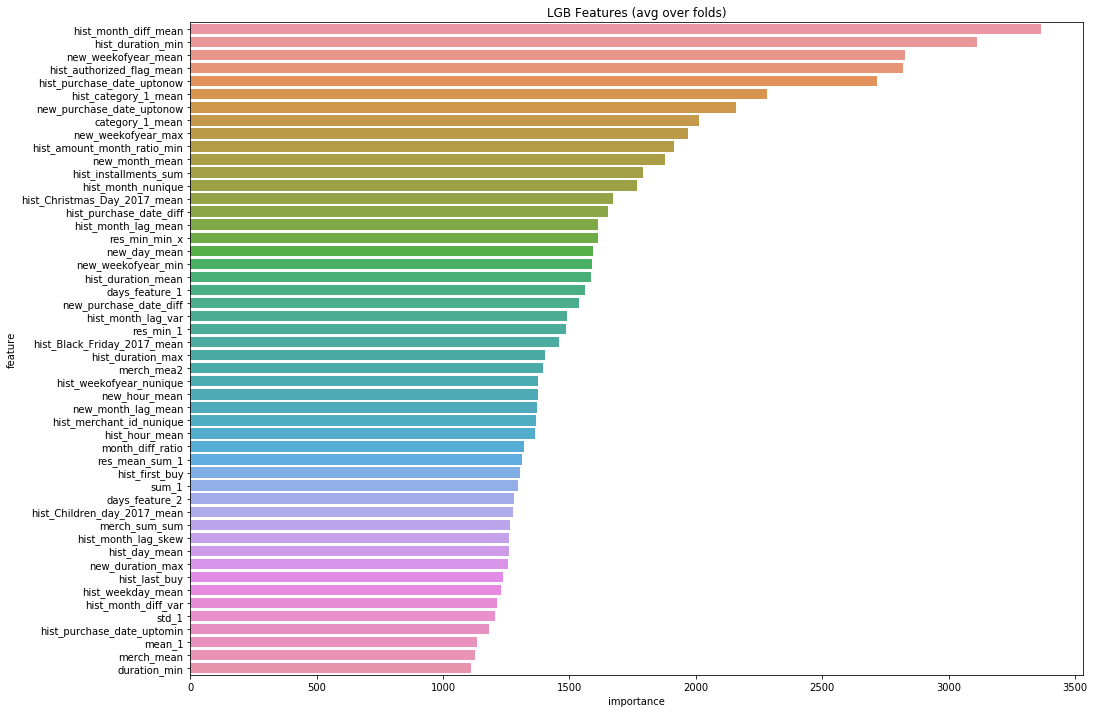

In [48]:
model, pred = model_train_easy(train_df, target, test_df)

In [49]:
train_df_unclear = train_df
test_df_unclear = test_df

In [50]:
train_df, test_df = add_card_id()

In [51]:
hist_lag0 = hist[hist['month_lag'] == 0].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag0.columns = ['card_id', 'lag0_std', 'lag0_count']

hist_lag1 = hist[hist['month_lag'] == -1].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag1.columns = ['card_id','lag1_std', 'lag1_count']

hist_lag2 = hist[hist['month_lag'] == -2].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag2.columns = ['card_id','lag2_std', 'lag2_count']

hist_lag3 = hist[hist['month_lag'] == -3].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag3.columns = ['card_id','lag3_std', 'lag3_count']

hist_lag4 = hist[hist['month_lag'] == -4].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag4.columns = ['card_id','lag4_std', 'lag4_count']

hist_lag5 = hist[hist['month_lag'] == -5].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag5.columns = ['card_id','lag5_std', 'lag5_count']

hist_lag6 = hist[hist['month_lag'] == -6].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag6.columns = ['card_id','lag6_std', 'lag6_count']

hist_lag7 = hist[hist['month_lag'] == -7].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag7.columns = ['card_id','lag7_std', 'lag7_count']

hist_lag8 = hist[hist['month_lag'] == -8].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag8.columns = ['card_id','lag8_std', 'lag8_count']

hist_lag9 = hist[hist['month_lag'] == -9].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag9.columns = ['card_id','lag9_std', 'lag9_count']

hist_lag10 = hist[hist['month_lag'] == -10].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag10.columns = ['card_id','lag10_std', 'lag10_count']

hist_lag11 = hist[hist['month_lag'] == -11].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag11.columns = ['card_id','lag11_std', 'lag11_count']

hist_lag12 = hist[hist['month_lag'] == -12].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag12.columns = ['card_id','lag12_std', 'lag12_count']

hist_lag13 = hist[hist['month_lag'] == -13].groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
hist_lag13.columns = ['card_id','lag13_std', 'lag13_count']


new_purch = new.groupby('card_id')['purchase_amount'].agg(['std', 'count']).reset_index()
new_purch.columns = ['card_id', 'new_std', 'new_count']


In [52]:
new_hist_lag0 = pd.merge(new_purch, hist_lag0, on='card_id', how='left')
new_hist_lag0['res_std_0'] = new_hist_lag0['new_std'] / new_hist_lag0['lag0_std']
new_hist_lag0['res_count_0'] = new_hist_lag0['new_count'] / new_hist_lag0['lag0_count']

new_hist_lag0['res_std_count_0'] = new_hist_lag0['new_std'] / new_hist_lag0['lag0_count']

lag_0 = pd.DataFrame({'card_id': new_hist_lag0['card_id'], 
                      'res_std_0': new_hist_lag0['res_std_0'], 'res_count_0': new_hist_lag0['res_count_0'],
                    'res_std_count_0': new_hist_lag0['res_std_count_0'] })
lag_0.fillna(lag_0.iloc[:, 1:].median(), inplace=True)


In [53]:
new_hist_lag1 = pd.merge(new_purch, hist_lag1, on='card_id', how='left')
new_hist_lag1['res_std_1'] = new_hist_lag1['new_std'] / new_hist_lag1['lag1_std']
new_hist_lag1['res_count_1'] = new_hist_lag1['new_count'] / new_hist_lag1['lag1_count']

new_hist_lag1['res_std_count_1'] = new_hist_lag1['new_std'] / new_hist_lag1['lag1_count']

lag_1 = pd.DataFrame({'card_id': new_hist_lag1['card_id'], 
                      'res_std_1': new_hist_lag1['res_std_1'], 'res_count_1': new_hist_lag1['res_count_1'],
                    'res_std_count_1': new_hist_lag1['res_std_count_1'] })
lag_1.fillna(lag_1.iloc[:, 1:].median(), inplace=True)


In [54]:
new_hist_lag2 = pd.merge(new_purch, hist_lag2, on='card_id', how='left')
new_hist_lag2['res_std_2'] = new_hist_lag2['new_std'] / new_hist_lag2['lag2_std']
new_hist_lag2['res_count_2'] = new_hist_lag2['new_count'] / new_hist_lag2['lag2_count']

new_hist_lag2['res_std_count_2'] = new_hist_lag2['new_std'] / new_hist_lag2['lag2_count']

lag_2 = pd.DataFrame({'card_id': new_hist_lag2['card_id'], 
                      'res_std_2': new_hist_lag2['res_std_2'], 'res_count_2': new_hist_lag2['res_count_2'],
                    'res_std_count_2': new_hist_lag2['res_std_count_2'] })
lag_2.fillna(lag_2.iloc[:, 1:].median(), inplace=True)


In [55]:
new_hist_lag3 = pd.merge(new_purch, hist_lag3, on='card_id', how='left')
new_hist_lag3['res_std_3'] = new_hist_lag3['new_std'] / new_hist_lag3['lag3_std']
new_hist_lag3['res_count_3'] = new_hist_lag3['new_count'] / new_hist_lag3['lag3_count']

new_hist_lag3['res_std_count_3'] = new_hist_lag3['new_std'] / new_hist_lag3['lag3_count']

lag_3 = pd.DataFrame({'card_id': new_hist_lag3['card_id'], 
                      'res_std_3': new_hist_lag3['res_std_3'], 'res_count_3': new_hist_lag3['res_count_3'],
                    'res_std_count_3': new_hist_lag3['res_std_count_3'] })
lag_3.fillna(lag_3.iloc[:, 1:].median(), inplace=True)


In [56]:
new_hist_lag4 = pd.merge(new_purch, hist_lag4, on='card_id', how='left')
new_hist_lag4['res_std_4'] = new_hist_lag4['new_std'] / new_hist_lag4['lag4_std']
new_hist_lag4['res_count_4'] = new_hist_lag4['new_count'] / new_hist_lag4['lag4_count']

new_hist_lag4['res_std_count_4'] = new_hist_lag4['new_std'] / new_hist_lag4['lag4_count']

lag_4 = pd.DataFrame({'card_id': new_hist_lag4['card_id'], 
                      'res_std_4': new_hist_lag4['res_std_4'], 'res_count_4': new_hist_lag4['res_count_4'],
                    'res_std_count_4': new_hist_lag4['res_std_count_4'] })
lag_4.fillna(lag_4.iloc[:, 1:].median(), inplace=True)


In [57]:
new_hist_lag5 = pd.merge(new_purch, hist_lag5, on='card_id', how='left')
new_hist_lag5['res_std_5'] = new_hist_lag5['new_std'] / new_hist_lag5['lag5_std']
new_hist_lag5['res_count_5'] = new_hist_lag5['new_count'] / new_hist_lag5['lag5_count']

new_hist_lag5['res_std_count_5'] = new_hist_lag5['new_std'] / new_hist_lag5['lag5_count']

lag_5 = pd.DataFrame({'card_id': new_hist_lag5['card_id'], 
                      'res_std_5': new_hist_lag5['res_std_5'], 'res_count_5': new_hist_lag5['res_count_5'],
                    'res_std_count_5': new_hist_lag5['res_std_count_5'] })
lag_5.fillna(lag_5.iloc[:, 1:].median(), inplace=True)


In [58]:
new_hist_lag6 = pd.merge(new_purch, hist_lag6, on='card_id', how='left')
new_hist_lag6['res_std_6'] = new_hist_lag6['new_std'] / new_hist_lag6['lag6_std']
new_hist_lag6['res_count_6'] = new_hist_lag6['new_count'] / new_hist_lag6['lag6_count']

new_hist_lag6['res_std_count_6'] = new_hist_lag6['new_std'] / new_hist_lag6['lag6_count']

lag_6 = pd.DataFrame({'card_id': new_hist_lag6['card_id'], 
                      'res_std_6': new_hist_lag6['res_std_6'], 'res_count_6': new_hist_lag6['res_count_6'],
                    'res_std_count_6': new_hist_lag6['res_std_count_6'] })
lag_6.fillna(lag_6.iloc[:, 1:].median(), inplace=True)


In [59]:
new_hist_lag7 = pd.merge(new_purch, hist_lag7, on='card_id', how='left')
new_hist_lag7['res_std_7'] = new_hist_lag7['new_std'] / new_hist_lag7['lag7_std']
new_hist_lag7['res_count_7'] = new_hist_lag7['new_count'] / new_hist_lag7['lag7_count']

new_hist_lag7['res_std_count_7'] = new_hist_lag7['new_std'] / new_hist_lag7['lag7_count']

lag_7 = pd.DataFrame({'card_id': new_hist_lag7['card_id'], 
                      'res_std_7': new_hist_lag7['res_std_7'], 'res_count_7': new_hist_lag7['res_count_7'],
                    'res_std_count_7': new_hist_lag7['res_std_count_7'] })
lag_7.fillna(lag_7.iloc[:, 1:].median(), inplace=True)


In [60]:
new_hist_lag8 = pd.merge(new_purch, hist_lag8, on='card_id', how='left')
new_hist_lag8['res_std_8'] = new_hist_lag8['new_std'] / new_hist_lag8['lag8_std']
new_hist_lag8['res_count_8'] = new_hist_lag8['new_count'] / new_hist_lag8['lag8_count']

new_hist_lag8['res_std_count_8'] = new_hist_lag8['new_std'] / new_hist_lag8['lag8_count']

lag_8 = pd.DataFrame({'card_id': new_hist_lag8['card_id'], 
                      'res_std_8': new_hist_lag8['res_std_8'], 'res_count_8': new_hist_lag8['res_count_8'],
                    'res_std_count_8': new_hist_lag8['res_std_count_8'] })
lag_8.fillna(lag_8.iloc[:, 1:].median(), inplace=True)


In [61]:
new_hist_lag9 = pd.merge(new_purch, hist_lag9, on='card_id', how='left')
new_hist_lag9['res_std_9'] = new_hist_lag9['new_std'] / new_hist_lag9['lag9_std']
new_hist_lag9['res_count_9'] = new_hist_lag9['new_count'] / new_hist_lag9['lag9_count']

new_hist_lag9['res_std_count_9'] = new_hist_lag9['new_std'] / new_hist_lag9['lag9_count']

lag_9 = pd.DataFrame({'card_id': new_hist_lag9['card_id'], 
                      'res_std_9': new_hist_lag9['res_std_9'], 'res_count_9': new_hist_lag9['res_count_9'],
                    'res_std_count_9': new_hist_lag9['res_std_count_9'] })
lag_9.fillna(lag_9.iloc[:, 1:].median(), inplace=True)


In [62]:
new_hist_lag10 = pd.merge(new_purch, hist_lag10, on='card_id', how='left')
new_hist_lag10['res_std_10'] = new_hist_lag10['new_std'] / new_hist_lag10['lag10_std']
new_hist_lag10['res_count_10'] = new_hist_lag10['new_count'] / new_hist_lag10['lag10_count']

new_hist_lag10['res_std_count_10'] = new_hist_lag10['new_std'] / new_hist_lag10['lag10_count']

lag_10 = pd.DataFrame({'card_id': new_hist_lag10['card_id'], 
                      'res_std_10': new_hist_lag10['res_std_10'], 'res_count_10': new_hist_lag10['res_count_10'],
                    'res_std_count_10': new_hist_lag10['res_std_count_10'] })
lag_10.fillna(lag_10.iloc[:, 1:].median(), inplace=True)


In [63]:
new_hist_lag11 = pd.merge(new_purch, hist_lag11, on='card_id', how='left')
new_hist_lag11['res_std_11'] = new_hist_lag11['new_std'] / new_hist_lag11['lag11_std']
new_hist_lag11['res_count_11'] = new_hist_lag11['new_count'] / new_hist_lag11['lag11_count']

new_hist_lag11['res_std_count_11'] = new_hist_lag11['new_std'] / new_hist_lag11['lag11_count']

lag_11 = pd.DataFrame({'card_id': new_hist_lag11['card_id'], 
                      'res_std_11': new_hist_lag11['res_std_11'], 'res_count_11': new_hist_lag11['res_count_11'],
                    'res_std_count_11': new_hist_lag11['res_std_count_11'] })
lag_11.fillna(lag_11.iloc[:, 1:].median(), inplace=True)


In [64]:
new_hist_lag12 = pd.merge(new_purch, hist_lag12, on='card_id', how='left')
new_hist_lag12['res_std_12'] = new_hist_lag12['new_std'] / new_hist_lag12['lag12_std']
new_hist_lag12['res_count_12'] = new_hist_lag12['new_count'] / new_hist_lag12['lag12_count']

new_hist_lag12['res_std_count_12'] = new_hist_lag12['new_std'] / new_hist_lag12['lag12_count']

lag_12 = pd.DataFrame({'card_id': new_hist_lag12['card_id'], 
                      'res_std_12': new_hist_lag12['res_std_12'], 'res_count_12': new_hist_lag12['res_count_12'],
                    'res_std_count_12': new_hist_lag12['res_std_count_12'] })
lag_12.fillna(lag_12.iloc[:, 1:].median(), inplace=True)


In [65]:
new_hist_lag13 = pd.merge(new_purch, hist_lag13, on='card_id', how='left')
new_hist_lag13['res_std_13'] = new_hist_lag13['new_std'] / new_hist_lag13['lag13_std']
new_hist_lag13['res_count_13'] = new_hist_lag13['new_count'] / new_hist_lag13['lag13_count']

new_hist_lag13['res_std_count_13'] = new_hist_lag13['new_std'] / new_hist_lag13['lag13_count']

lag_13 = pd.DataFrame({'card_id': new_hist_lag13['card_id'], 
                      'res_std_13': new_hist_lag13['res_std_13'], 'res_count_13': new_hist_lag13['res_count_13'],
                    'res_std_count_13': new_hist_lag13['res_std_count_13'] })
lag_13.fillna(lag_13.iloc[:, 1:].median(), inplace=True)


In [66]:
lag = pd.concat([lag_0, lag_1, lag_2, lag_3, lag_4, lag_5,
                 lag_6, lag_7, lag_8, lag_9, lag_10, lag_11, lag_12, lag_13], axis=0)




In [67]:
lag['res_std'] = 0

sc2 = lag_0.shape[0]
lag['res_std'].iloc[:sc2] = lag['res_std_0'].iloc[:sc2]

sc1 = lag_0.shape[0]
sc2 = sc1 + lag_1.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_1'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_2.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_2'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_3.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_3'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_4.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_4'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_5.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_5'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_6.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_6'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_7.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_7'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_8.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_8'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_9.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_9'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_10.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_10'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_11.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_11'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_12.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_12'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_13.shape[0]
lag['res_std'].iloc[sc1:sc2] = lag['res_std_13'].iloc[sc1:sc2]

# lag['res_std'].iloc[lag_4.shape[0]:lag_5.shape[0]] = lag['res_std_5'].iloc[lag_4.shape[0]:lag_5.shape[0]]
# lag['res_std'].iloc[lag_5.shape[0]:lag_6.shape[0]] = lag['res_std_6'].iloc[lag_5.shape[0]:lag_6.shape[0]]
# lag['res_std'].iloc[lag_6.shape[0]:lag_7.shape[0]] = lag['res_std_7'].iloc[lag_6.shape[0]:lag_7.shape[0]]
# lag['res_std'].iloc[lag_7.shape[0]:lag_8.shape[0]] = lag['res_std_8'].iloc[lag_7.shape[0]:lag_8.shape[0]]
# lag['res_std'].iloc[lag_8.shape[0]:lag_9.shape[0]] = lag['res_std_9'].iloc[lag_8.shape[0]:lag_9.shape[0]]
# lag['res_std'].iloc[lag_9.shape[0]:lag_10.shape[0]] = lag['res_std_10'].iloc[lag_9.shape[0]:lag_10.shape[0]]
# lag['res_std'].iloc[lag_10.shape[0]:lag_11.shape[0]] = lag['res_std_11'].iloc[lag_10.shape[0]:lag_11.shape[0]]
# lag['res_std'].iloc[lag_11.shape[0]:lag_12.shape[0]] = lag['res_std_12'].iloc[lag_11.shape[0]:lag_12.shape[0]]
# lag['res_std'].iloc[lag_11.shape[0]:lag_13.shape[0]] = lag['res_std_13'].iloc[lag_12.shape[0]:lag_13.shape[0]]

In [68]:
lag['res_count'] = 0

sc2 = lag_0.shape[0]
lag['res_count'].iloc[:sc2] = lag['res_count_0'].iloc[:sc2]

sc1 = lag_0.shape[0]
sc2 = sc1 + lag_1.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_1'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_2.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_2'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_3.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_3'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_4.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_4'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_5.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_5'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_6.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_6'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_7.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_7'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_8.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_8'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_9.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_9'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_10.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_10'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_11.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_11'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_12.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_12'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_13.shape[0]
lag['res_count'].iloc[sc1:sc2] = lag['res_count_13'].iloc[sc1:sc2]

In [70]:
lag['res_std_count'] = 0

sc2 = lag_0.shape[0]
lag['res_std_count'].iloc[:sc2] = lag['res_std_count_0'].iloc[:sc2]

sc1 = lag_0.shape[0]
sc2 = sc1 + lag_1.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_1'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_2.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_2'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_3.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_3'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_4.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_4'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_5.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_5'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_6.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_6'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_7.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_7'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_8.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_8'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_9.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_9'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_10.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_10'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_11.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_11'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_12.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_12'].iloc[sc1:sc2]

sc1 = sc2
sc2 = sc2 + lag_13.shape[0]
lag['res_std_count'].iloc[sc1:sc2] = lag['res_std_count_13'].iloc[sc1:sc2]

In [71]:
lag_f = lag.groupby('card_id')['res_std'].agg(['mean', 'sum', 'max', 'min', 'std']).reset_index()
lag_f.columns = ['card_id', 'res_mean', 'res_sum', 'res_max', 'res_min', 'res_std']

lag_f_sum = lag.groupby('card_id')['res_count'].agg(['mean', 'sum' ,'max', 'min', 'std']).reset_index()
lag_f_sum.columns = ['card_id', 'res_mean_sum', 'res_sum_sum', 'res_max_max', 'res_min_min', 'res_std_std']

lag_f_mean_sum = lag.groupby('card_id')['res_std_count'].agg(['mean', 'sum',  'max', 'min', 'std']).reset_index()
lag_f_mean_sum.columns = ['card_id', 'res_mean_sum_1', 'res_sum_sum_1', 'res_max_1', 'res_min_1', 'res_std_1']

lag_f.head(5)

,card_id,res_mean,res_sum,res_max,res_min,res_std
0,C_ID_00007093c1,0.128862,1.804062,0.949590,0.015802,0.238824
1,C_ID_0001238066,1.172507,16.415104,1.800629,0.512769,0.367728
2,C_ID_0001506ef0,0.330358,4.625017,1.125222,0.011226,0.434507
3,C_ID_0001793786,1.138137,15.933914,1.760831,0.825570,0.306584
4,C_ID_000183fdda,0.787619,11.026664,1.151151,0.212972,0.340852


In [72]:
train_df = pd.merge(train_df, lag_f, on='card_id', how='left')
test_df = pd.merge(test_df, lag_f, on='card_id', how='left')

train_df = pd.merge(train_df, lag_f_sum, on='card_id', how='left')
test_df = pd.merge(test_df, lag_f_sum, on='card_id', how='left')

train_df = pd.merge(train_df, lag_f_mean_sum, on='card_id', how='left')
test_df = pd.merge(test_df, lag_f_mean_sum, on='card_id', how='left')

In [73]:
train_df.head(5)

,feature_1,feature_2,feature_3,quarter,elapsed_time,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,...,res_mean_sum_y,res_sum_sum_y,res_max_max_y,res_min_min_y,res_std_std_y,res_mean_sum_1_y,res_sum_sum_1_y,res_max_1_y,res_min_1_y,res_std_1_y
0,0.013145,0.00875,0.011430,2,604,3020,0.008280,1208,0.003311,604,...,1.246532,17.451451,7.666667,0.403509,1.866716,6.881312,96.338373,30.127095,1.585637,7.113832
1,0.010710,0.01138,0.010284,1,755,3020,0.005300,755,0.001325,0,...,0.298706,4.181880,0.600000,0.117647,0.143397,0.951259,13.317630,7.626113,0.186938,1.929707
2,0.010610,0.00875,0.010284,3,908,1816,0.002203,1816,0.002203,0,...,0.485998,6.803968,1.000000,0.142857,0.326165,7.449161,104.288251,8.112081,6.358728,0.562448
3,0.010710,0.01417,0.010284,3,512,2048,0.007812,1536,0.005860,0,...,0.671929,9.407008,1.166667,0.225806,0.263115,6.545031,91.630428,8.112081,1.414313,2.187833
4,0.008060,0.01417,0.010284,4,451,451,0.002218,1353,0.006653,0,...,0.761483,10.660760,1.714286,0.571429,0.329460,6.915009,96.810122,8.112081,3.238058,1.586002


In [75]:
train_df, test_df = drop_card_id()

Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.72041
[200]	training's rmse: 3.65647
[300]	training's rmse: 3.61836
[400]	training's rmse: 3.59218
[500]	training's rmse: 3.57248
[600]	training's rmse: 3.55627
[700]	training's rmse: 3.54198
[800]	training's rmse: 3.5302
[900]	training's rmse: 3.51855
[1000]	training's rmse: 3.50788
[1100]	training's rmse: 3.49785
[1200]	training's rmse: 3.48812
[1300]	training's rmse: 3.479
[1400]	training's rmse: 3.47043
[1500]	training's rmse: 3.46169
[1600]	training's rmse: 3.45338
[1700]	training's rmse: 3.44486
[1800]	training's rmse: 3.4364
[1900]	training's rmse: 3.42852
[2000]	training's rmse: 3.4207
[2100]	training's rmse: 3.41295
[2200]	training's rmse: 3.4055
[2300]	training's rmse: 3.39832
[2400]	training's rmse: 3.39073
[2500]	training's rmse: 3.38293
[2600]	training's rmse: 3.37584
[2700]	training's rmse: 3.36825
[2800]	training's rmse: 3.36033
[2900]	training's rmse: 3.35327
[3000]	training's rmse: 

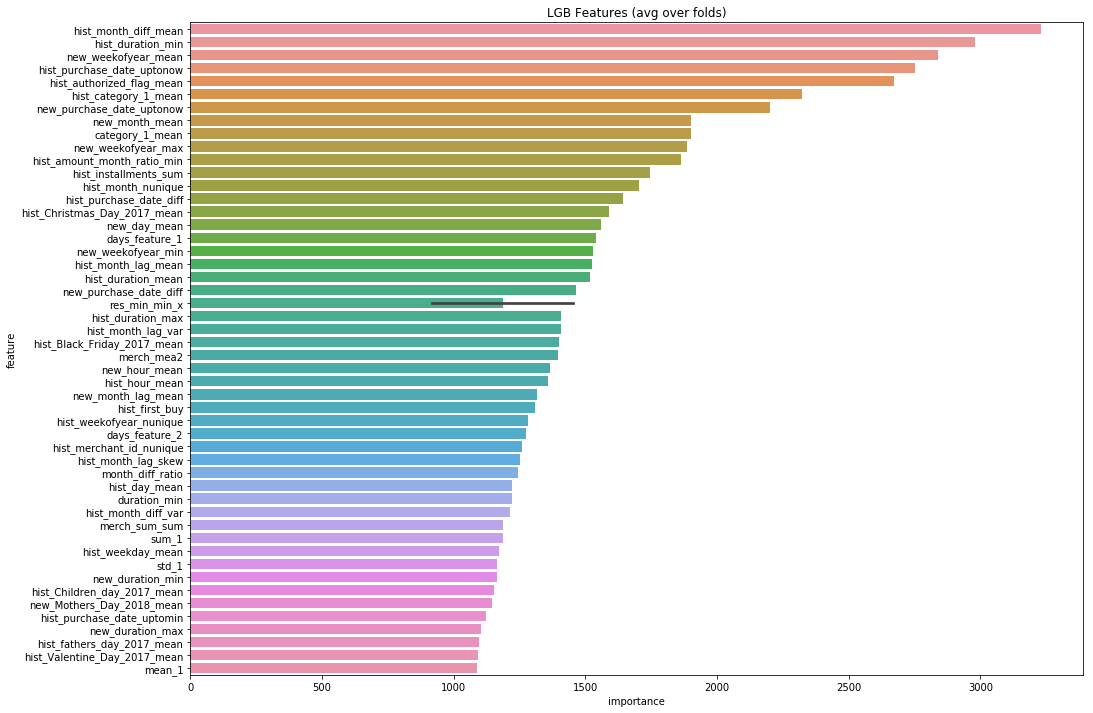

In [76]:
model, pred = model_train_easy(train_df, target, test_df)

In [84]:
train_df = train_df_algoparams
test_df = test_df_algoparams

In [85]:
train_df, test_df = drop_card_id()

In [86]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 4900, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

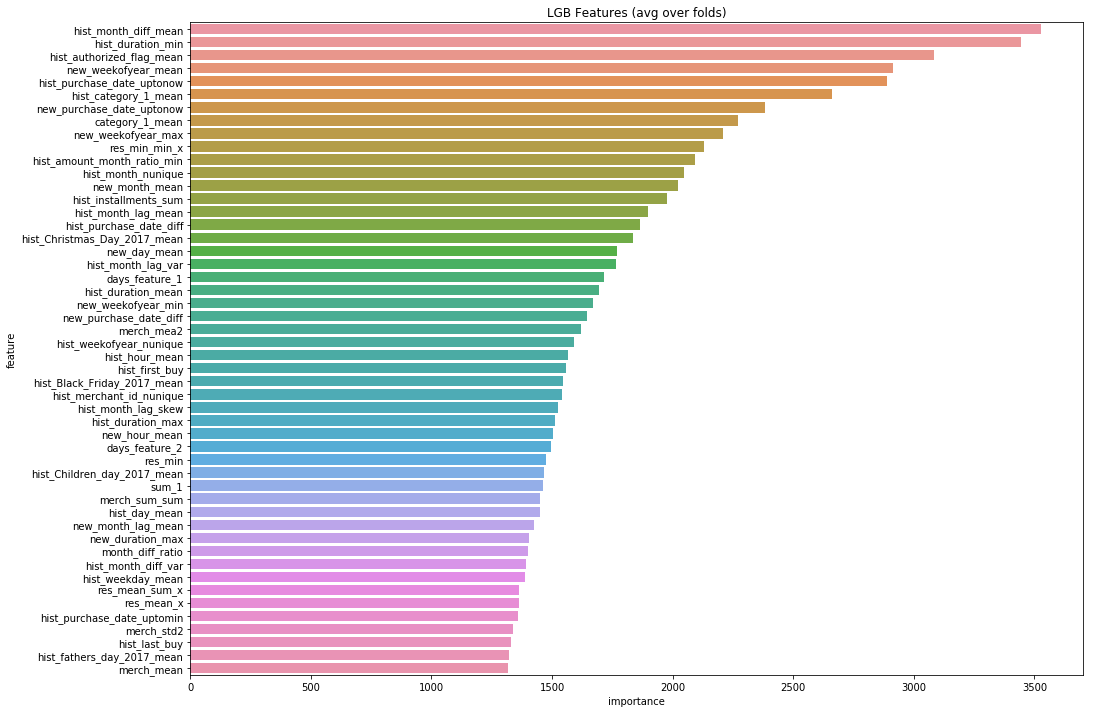

In [87]:
model, pred = model_train_easy(train_df, target, test_df)

In [88]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 5300, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

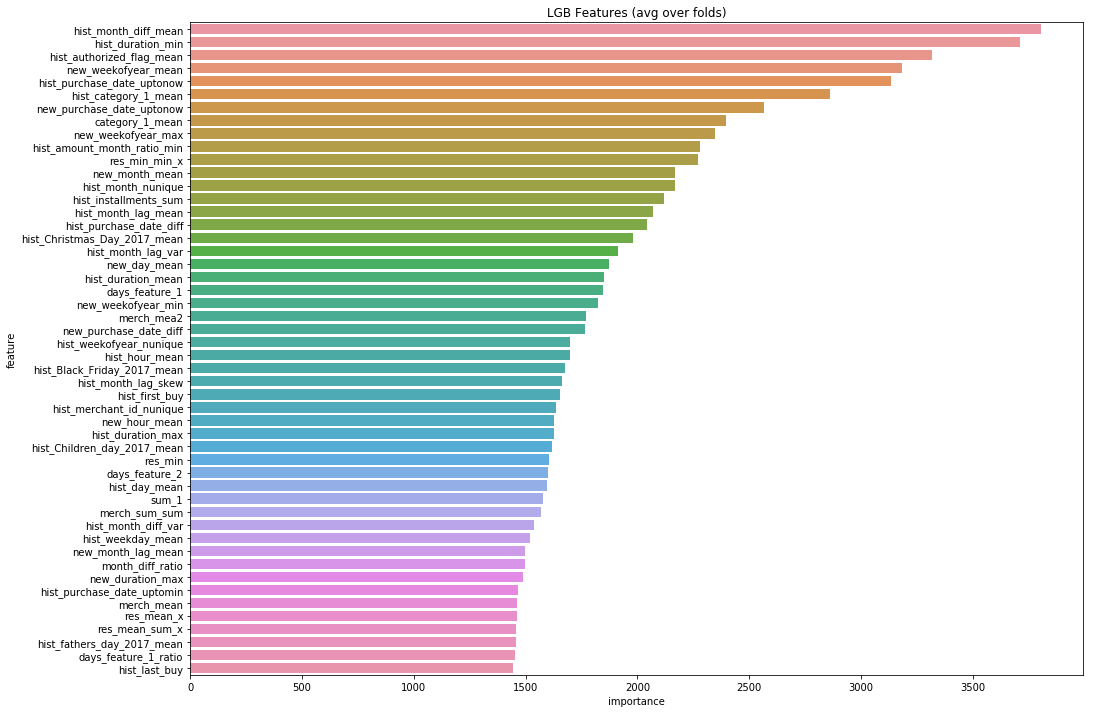

In [89]:
model, pred = model_train_easy(train_df, target, test_df)

In [90]:
params = {
            #'gpu_use_dp': False, 
            #'gpu_platform_id': 0, 
            #'gpu_device_id': 0, 
            #'device': 'gpu', 
#             'n_estimators': 30000,
            'objective': 'regression_l2', 
            'boosting_type': 'gbdt', 
            'n_jobs': 4, 'max_depth': 7, 
            'n_estimators': 6000, 
            'subsample_freq': 2, 
            'subsample_for_bin': 200000, 
            'min_data_per_group': 100, 
            'max_cat_to_onehot': 4, 
            'cat_l2': 10.0, 
            'cat_smooth': 10.0, 
            'max_cat_threshold': 32, 
            'metric_freq': 10, 
            'verbosity': -1, 
            'metric': 'rmse', 
            'colsample_bytree': 0.5, 
            'learning_rate': 0.0061033234451294376, 
            'min_child_samples': 80, 
            'min_child_weight': 100.0, 
            'min_split_gain': 1e-06, 
            'num_leaves': 47, 
            'reg_alpha': 10.0, 
            'reg_lambda': 10.0, 
            'subsample': 0.9}


Training until validation scores don't improve for 500 rounds.
[100]	training's rmse: 3.71978
[200]	training's rmse: 3.65694
[300]	training's rmse: 3.61997
[400]	training's rmse: 3.59422
[500]	training's rmse: 3.57527
[600]	training's rmse: 3.55901
[700]	training's rmse: 3.54452
[800]	training's rmse: 3.53206
[900]	training's rmse: 3.52059
[1000]	training's rmse: 3.51017
[1100]	training's rmse: 3.50064
[1200]	training's rmse: 3.49122
[1300]	training's rmse: 3.48209
[1400]	training's rmse: 3.47358
[1500]	training's rmse: 3.46524
[1600]	training's rmse: 3.45675
[1700]	training's rmse: 3.44828
[1800]	training's rmse: 3.43983
[1900]	training's rmse: 3.43214
[2000]	training's rmse: 3.42429
[2100]	training's rmse: 3.41655
[2200]	training's rmse: 3.40909
[2300]	training's rmse: 3.40132
[2400]	training's rmse: 3.39403
[2500]	training's rmse: 3.38647
[2600]	training's rmse: 3.37884
[2700]	training's rmse: 3.37166
[2800]	training's rmse: 3.36445
[2900]	training's rmse: 3.35735
[3000]	training's 

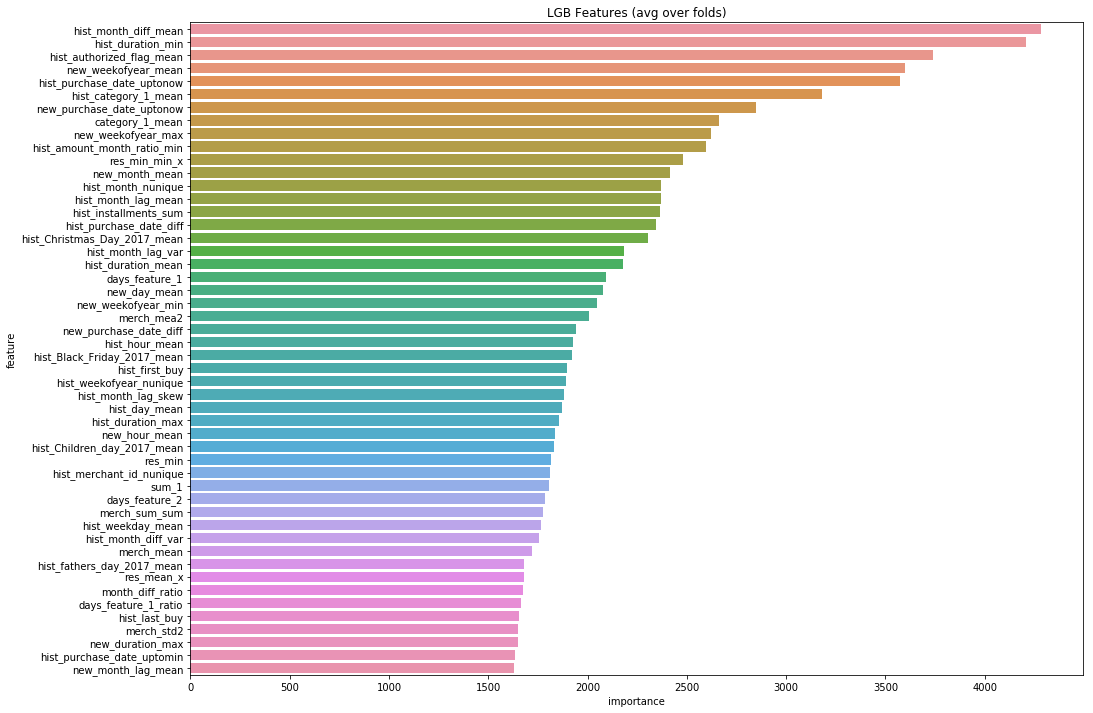

In [91]:
model, pred = model_train_easy(train_df, target, test_df)